# Question 1

# Occupations

Step 1. Import the necessary libraries

In [58]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users.

In [59]:
users= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\Occupation.csv")

Step 4. Discover what is the mean age per occupation.

In [60]:
users.groupby('occupation')['age'].mean()                               #using groupby function

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least.

In [61]:
users['male'] = users.gender.apply(lambda x: True if x == 'M' else False)
users.male

0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: male, Length: 943, dtype: bool

In [62]:
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [63]:
users.groupby('occupation')['male'].sum().sort_values(ascending=False).head()

occupation
student       136
educator       69
other          69
engineer       65
programmer     60
Name: male, dtype: int64

Step 6. For each occupation, calculate the minimum and maximum ages.

In [64]:
users.pivot_table(index=('occupation'),values=['age'],aggfunc=[np.max,np.min])     
     #used pivot_table in order to execute aggregate functions in a sinle line

,amax,amin
,age,age
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22


Step 7. For each combination of occupation and sex, calculate the mean age.

In [65]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men.

https://stackoverflow.com/questions/53060915/how-to-get-the-rolling-mean-and-find-the-percentage-of-male-and-female-in-each-o #reference

In [66]:
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100
x=occup_gender.iloc[: , 1]
x

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

# Euro Teams

Step 1. Import the necessary libraries

In [67]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

In [68]:
euro12= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\Euro teams.csv")

In [69]:
euro12.columns       #checking the column names

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

Step 4. Select only the Goal column

In [70]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [71]:
euro12['Team'].nunique()

16

Step 6. What is the number of columns in the dataset?

In [72]:
euro12.shape[1]

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [73]:
discipline=euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [74]:
discipline_sort = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending = True)
discipline_sort

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [75]:
discipline['Yellow Cards'].mean()

7.4375

Step 10. Filter teams that scored more than 6 goals

In [76]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,0.478,0.156,80,2,1,0,...,10,0.626,63,49,12,4,0,15,15,17
13,Spain,12,42,33,0.559,0.160,100,0,1,0,...,15,0.938,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [77]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,0.478,0.156,80,2,1,0,...,10,0.626,63,49,12,4,0,15,15,17
6,Greece,5,8,18,0.307,0.192,32,1,1,1,...,13,0.651,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [78]:
euro12.iloc[ :,:7]          #loc method is used

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,0.519,0.160,32
1,Czech Republic,4,13,18,0.419,0.129,39
2,Denmark,4,10,10,0.500,0.200,27
3,England,5,11,18,0.500,0.172,40
4,France,3,22,24,0.379,0.065,65
5,Germany,10,32,32,0.478,0.156,80
6,Greece,5,8,18,0.307,0.192,32
7,Italy,6,34,45,0.430,0.075,110
8,Netherlands,2,12,36,0.250,0.041,60
9,Poland,2,15,23,0.394,0.052,48


Step 13. Select all columns except the last 3

In [79]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,0.519,0.160,32,0,0,0,...,0,10,3,13,0.813,41,62,2,9,0
1,Czech Republic,4,13,18,0.419,0.129,39,0,0,0,...,1,10,6,9,0.601,53,73,8,7,0
2,Denmark,4,10,10,0.500,0.200,27,1,0,0,...,1,10,5,10,0.667,25,38,8,4,0
3,England,5,11,18,0.500,0.172,40,0,0,0,...,2,29,3,22,0.881,43,45,6,5,0
4,France,3,22,24,0.379,0.065,65,1,0,0,...,1,7,5,6,0.546,36,51,5,6,0
5,Germany,10,32,32,0.478,0.156,80,2,1,0,...,1,11,6,10,0.626,63,49,12,4,0
6,Greece,5,8,18,0.307,0.192,32,1,1,1,...,1,23,7,13,0.651,67,48,12,9,1
7,Italy,6,34,45,0.430,0.075,110,2,0,0,...,2,18,7,20,0.741,101,89,16,16,0
8,Netherlands,2,12,36,0.250,0.041,60,2,0,0,...,0,9,5,12,0.706,35,30,3,5,0
9,Poland,2,15,23,0.394,0.052,48,0,0,0,...,0,8,3,6,0.667,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [80]:
euro12[((euro12['Team']=='England') | (euro12['Team']=='Italy')) | ((euro12['Team']=='Russia'))]    #filtering method is used

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
3,England,5,11,18,0.500,0.172,40,0,0,0,...,22,0.881,43,45,6,5,0,11,11,16
7,Italy,6,34,45,0.430,0.075,110,2,0,0,...,20,0.741,101,89,16,16,0,18,18,19
12,Russia,5,9,31,0.225,0.125,59,2,0,0,...,10,0.770,34,43,4,6,0,7,7,16


# Question 3

# Housing

Step 1. Import the necessary libraries

In [81]:
import numpy as np
import pandas as pd
import random

Step 2. Create 3 differents Series, each of length 100, as follows:
    
• The first a random number from 1 to 4

In [82]:
random_numbers_1= pd.Series(np.random.randint(1,4, size = 100))
print(random_numbers_1)

0     3
1     1
2     1
3     2
4     3
     ..
95    1
96    1
97    1
98    3
99    3
Length: 100, dtype: int32


• The second a random number from 1 to 3

In [83]:
random_numbers_2 = pd.Series(np.random.randint(1,3, size = 100))
print(random_numbers_2)

0     2
1     2
2     1
3     2
4     1
     ..
95    2
96    2
97    1
98    1
99    2
Length: 100, dtype: int32


• The third a random number from 10,000 to 30,000

In [51]:
random_numbers_3 = pd.Series(np.random.randint(10000,30000, size = 100))
print(random_numbers_3)

0     10646
1     21662
2     15519
3     25739
4     29907
      ...  
95    17021
96    29099
97    22284
98    24161
99    22013
Length: 100, dtype: int32


Step 3. Create a DataFrame by joinning the Series by column

In [84]:
df_series= pd.concat([random_numbers_1,random_numbers_2,random_numbers_3],axis=1)
print(df_series)

    0  1      2
0   3  2  10646
1   1  2  21662
2   1  1  15519
3   2  2  25739
4   3  1  29907
.. .. ..    ...
95  1  2  17021
96  1  2  29099
97  1  1  22284
98  3  1  24161
99  3  2  22013

[100 rows x 3 columns]


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [85]:
df_series.columns=['bedrs','bathrs','price_sqr_meter']
print(df_series)

    bedrs  bathrs  price_sqr_meter
0       3       2            10646
1       1       2            21662
2       1       1            15519
3       2       2            25739
4       3       1            29907
..    ...     ...              ...
95      1       2            17021
96      1       2            29099
97      1       1            22284
98      3       1            24161
99      3       2            22013

[100 rows x 3 columns]


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

https://leechamin.tistory.com/207   #reference

In [86]:
bigcolumn = pd.concat([random_numbers_1,random_numbers_2,random_numbers_3])  
bigcolumn= bigcolumn.to_frame()
print(bigcolumn)

        0
0       3
1       1
2       1
3       2
4       3
..    ...
95  17021
96  29099
97  22284
98  24161
99  22013

[300 rows x 1 columns]


Step 6. Ops it seems it is going only until index 99. Is it true?

In [87]:
len(bigcolumn)

300

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [88]:
bigcolumn.reset_index(drop=True)
print(bigcolumn)

        0
0       3
1       1
2       1
3       2
4       3
..    ...
95  17021
96  29099
97  22284
98  24161
99  22013

[300 rows x 1 columns]


# Question 4

# Wind Statistics

The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
    
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL

61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

In [90]:
import numpy as np
import pandas as pd
from datetime import datetime
import datetime as dt
from datetime import date
from datetime import time

Step 2. Import the dataset from this address

In [91]:
wind_data= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\Wind Statistics.csv")
print(wind_data)

      Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0     61   1   1  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1     61   1   2  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2     61   1   3  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3     61   1   4  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4     61   1   5  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...   ..  ..  ..    ...    ...    ...    ...    ...    ...    ...    ...   
6569  78  12  27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570  78  12  28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571  78  12  29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572  78  12  30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573  78  12  31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.6

In [92]:
wind_data.columns                #checking column names

Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')

https://www.kaggle.com/kunalmadaan03/pandas-datetime-operations #reference

Used the reference and i tried modifying the code on my own.    

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [93]:
wind_data= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\Wind Statistics.csv")
wind_data["Date"] = pd.to_datetime(wind_data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = wind_data.drop(columns=["Yr","Mo","Dy"])
print(data)

        RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO  \
0     15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83  12.58   
1     14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   9.67   
2     18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   7.67   
3     10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   
4     13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04  14.00   
6570  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25  18.05   
6571  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50  16.42   
6572  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46  12.12   
6573  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58  11.38   

        BEL    MAL       Date  
0     18.50  15.04 2061-01-01  

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [94]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
print(data)

        RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO  \
0     15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83  12.58   
1     14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   9.67   
2     18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   7.67   
3     10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   
4     13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04  14.00   
6570  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25  18.05   
6571  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50  16.42   
6572  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46  12.12   
6573  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58  11.38   

        BEL    MAL       Date  
0     18.50  15.04 1961-01-01  

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [95]:
newdata = data.set_index("Date")
newdata.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations
below.

In [96]:
newdata.isnull().values.sum()

31

Step 7. Compute how many non-missing values there are in total.

In [97]:
newdata.count().sum()

78857

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.

In [98]:
windspeeds=newdata.mean()
windspeeds.mean()

10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds at each location over all the days
A different set of numbers for each location.

In [99]:
loc_stats=newdata.describe()
print(loc_stats)

               RPT          VAL          ROS          KIL          SHA  \
count  6568.000000  6571.000000  6572.000000  6569.000000  6572.000000   
mean     12.362987    10.644314    11.660526     6.306468    10.455834   
std       5.618413     5.267356     5.008450     3.605811     4.936125   
min       0.670000     0.210000     1.500000     0.000000     0.130000   
25%       8.120000     6.670000     8.000000     3.580000     6.750000   
50%      11.710000    10.170000    10.920000     5.750000     9.960000   
75%      15.920000    14.040000    14.670000     8.420000    13.540000   
max      35.800000    33.370000    33.840000    28.460000    37.540000   

               BIR          DUB          CLA          MUL          CLO  \
count  6574.000000  6571.000000  6572.000000  6571.000000  6573.000000   
mean      7.092254     9.797343     8.495053     8.493590     8.707332   
std       3.968683     4.977555     4.499449     4.166872     4.503954   
min       0.000000     0.000000     0

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the
windspeeds across all the locations at each day.
A different set of numbers for each day.

In [100]:
newdata_stats = pd.DataFrame()
newdata_stats['min'] = newdata.min(axis=1)
newdata_stats['max'] = newdata.max(axis=1)
newdata_stats['mean'] = newdata.mean(axis=1)
newdata_stats['std'] = newdata.std(axis=1)
print(newdata_stats)

             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [101]:
January=newdata.loc[newdata.index.month == 1].mean()
print(January)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


Step 12. Downsample the record to a yearly frequency for each location.

In [102]:
newdata.groupby(newdata.index.to_period('Y')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


Step 13. Downsample the record to a monthly frequency for each location.

In [103]:
newdata.groupby(newdata.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


Step 14. Downsample the record to a weekly frequency for each location.

In [104]:
newdata.groupby(newdata.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for 
each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [105]:
weekly = newdata.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53]]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Question 5

Step 1. Import the necessary libraries

In [106]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

In [107]:
chipo= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\Chipo.csv")

https://colab.research.google.com/github/jaymalak/pandas_exercises/blob/master/Exercises.ipynb#scrollTo=4fiIkh3EjtZI  #reference
    
used the reference but i modified all the code on my own.    

Step 4. See the first 10 entries

In [108]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips,and,Fresh
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket,Nectar,[Apple]
3,1,1,Chips,and,Tomatillo-Green
4,2,2,Chicken,Bowl,[Tomatillo-Red
5,3,1,Chicken,Bowl,[Fresh
6,3,1,Side,of,Chips
7,4,1,Steak,Burrito,[Tomatillo
8,4,1,Steak,Soft,Tacos
9,5,1,Steak,Burrito,[Fresh


Step 5. What is the number of observations in the dataset?

In [109]:
chipo.shape[0]

4622

Step 6. What is the number of columns in the dataset?

In [110]:
chipo.shape[1]

5

Step 7. Print the name of all the columns.

In [111]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [112]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [113]:
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)

item_name
Chicken    1654
Name: quantity, dtype: int64

Step 10. For the most-ordered item, how many items were ordered?

In [114]:
chipo.groupby('item_name').sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken,1484575,1654


Step 11. What was the most ordered item in the choice_description column?

In [115]:
chipo.groupby(by='choice_description').sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
Burrito,1033072,1225


Step 12. How many items were orderd in total?

In [116]:
chipo.item_name.count()

4622

Step 13.
• Turn the item price into a float

• Check the item price type

In [117]:
chipo['item_price'].dtypes

dtype('O')

• Create a lambda function and change the type of item price.

In [118]:
chipo.item_price = chipo.item_price.str.replace('$', '')        #used replace function code instead of lambda function
chipo.item_price

0                 Fresh
1                  3.39
2               [Apple]
3       Tomatillo-Green
4        [Tomatillo-Red
             ...       
4617             [Fresh
4618             [Fresh
4619               Bowl
4620               Bowl
4621               Bowl
Name: item_price, Length: 4622, dtype: object

In [119]:
chipo['item_price']=pd.to_numeric(chipo['item_price'],errors='coerce')
chipo['item_price']

0        NaN
1       3.39
2        NaN
3        NaN
4        NaN
        ... 
4617     NaN
4618     NaN
4619     NaN
4620     NaN
4621     NaN
Name: item_price, Length: 4622, dtype: float64

• Check the item price type

In [120]:
chipo['item_price'].dtypes

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [121]:
revenue = (chipo['item_price'] * chipo['quantity']).sum()
print(revenue)

648.1399999999999


Step 15. How many orders were made in the period?

In [122]:
chipo['order_id'].value_counts().count()

1834

Step 16. What is the average revenue amount per order?

https://colab.research.google.com/github/jaymalak/pandas_exercises/blob/master/Exercises.ipynb#scrollTo=DytlzK1JjtZn    #reference

In [124]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']            
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']
chipo.groupby('order_id').sum().mean()['revenue']

0.3534023991275888

Step 17. How many different items are sold?

In [125]:
chipo['item_name'].value_counts().count()

16

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. 
Label both lines and show the legend.Don't forget to label your axes!

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
df_line= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\us-marriages-divorces-1867-2014.csv")

In [127]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

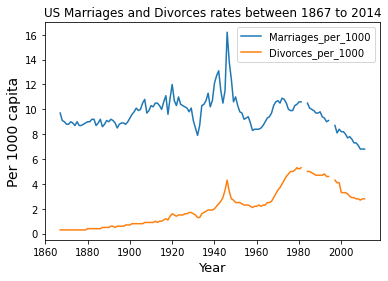

In [128]:
df_line.plot('Year',y=['Marriages_per_1000','Divorces_per_1000']).plot(kind='line')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Per 1000 capita',fontsize=14)
plt.title(('US Marriages and Divorces rates between 1867 to 2014'))
pylab.legend()
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

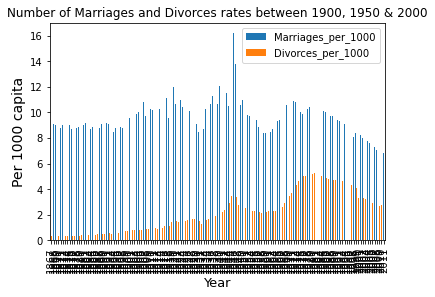

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
df_vertical= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\us-marriages-divorces-1867-2014.csv")
df_vertical.plot('Year',y=(['Marriages_per_1000','Divorces_per_1000']),kind='bar')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Per 1000 capita',fontsize=14)
plt.title(('Number of Marriages and Divorces rates between 1900, 1950 & 2000'))
plt.show()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and 
label each bar with the corresponding actor's name.Don't forget to label your axes!

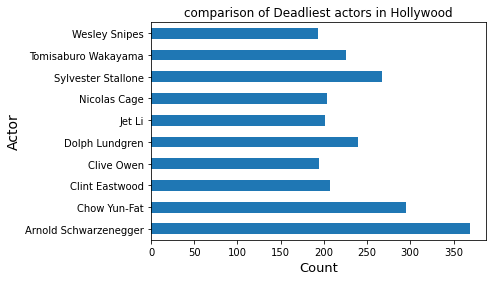

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
hollywood_actor_kills= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\actor_kill_counts.csv")
hollywood_actor_kills.groupby('Actor')['Count'].sum().plot(kind='barh')
plt.xlabel('Count',fontsize=13)
plt.ylabel('Actor',fontsize=14)
plt.title(('comparison of Deadliest actors in Hollywood'))
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

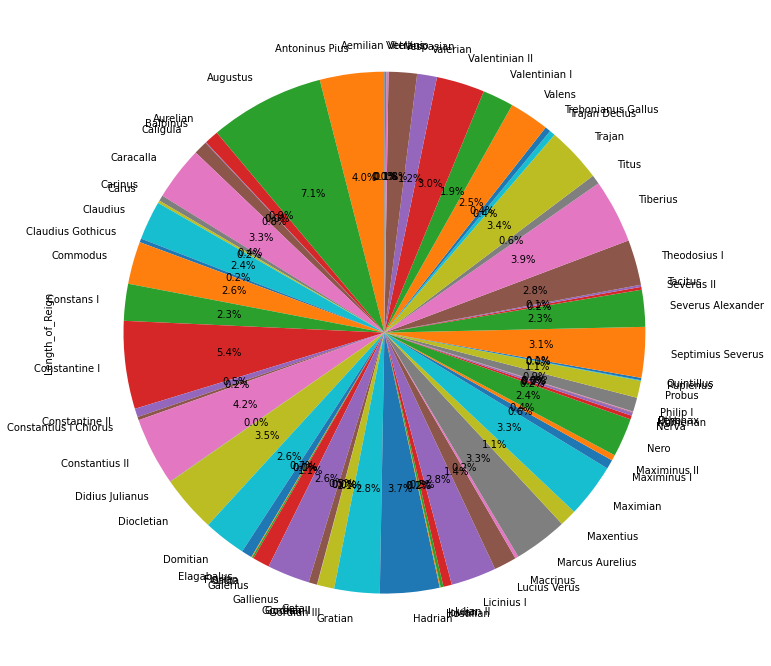

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
roman_emperors = pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\roman-emperor-reigns.csv")
assassinated_emperors = roman_emperors
roman_emperors['Cause_of_Death']=assassinated_emperors
assassinated_emperors
assassinated_emperors.groupby('Emperor')['Length_of_Reign'].sum().plot(kind='pie',autopct='%1.1f%%',startangle=90,figsize=(18,12))
plt.show()

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science
PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

Text(0.5, 1.0, 'Relationship between total Arcade revenue & CS PhDs awarded')

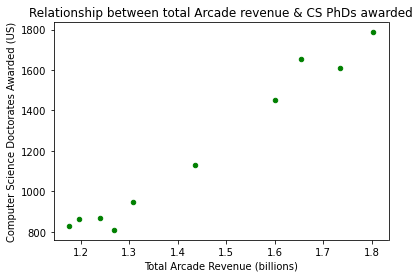

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
arcade_revenue_cs_doctorates= pd.read_csv("C:\\Users\\Madhumitha\\Desktop\\Big Data\\Data Programming\\Problemset 3\\arcade-revenue-vs-cs-doctorates.csv")
arcade_revenue_cs_doctorates.plot(kind='scatter',x='Total Arcade Revenue (billions)',y='Computer Science Doctorates Awarded (US)',
color='Green')
plt.title('Relationship between total Arcade revenue & CS PhDs awarded')